# **Задача**   

---

**Разработка универсального метода анализа базы данных по продажам товаров.**  

# **Критерии оценки**

---
Кейс оценивается суммой баллов, получаемых согласно следующим критериям:

Проработка бизнес-задачи проекта (проблематика проекта) — 3 балла;

Понимание данных — 3 балла;

Подготовка данных — 3 балла;

Моделирование — 3 балла;

Оценка — 3 балла;

Развёртывание - 3 балла.

**Проходной балл - 9 баллов.**


**Проработка бизнес-задачи проекта.**

Для торговли очень важно вовремя среагировать на изменение покупательской способности, изменение рентабельности, изменение вкусов и предпочтений потребителя, формирующих спрос на продукцию. Необходим постоянный мониторинг объемов продаж на том или ином направлении. Мониторинг эффективности вложений в рекламу. 

Пранализируем, какие страны являются наиболее перспективными изходя из предложенной базы-данных. Какие сильно уступают по объемам продаж и какие возможные действия необходимо предпринять для исправления ситуации. 



**Устанавливаем библиотеки (при необходимости)**

In [ ]:
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1310 sha256=d73d53b3fba9fd82910aba353408401780627a76d8d016251faf14e6c15aedc0
  Stored in directory: /root/.cache/pip/wheels/88/2c/2b/d12ab5bb9f34eba42f98231b969311f33d7dc1a2f484b902d1
Successfully built unzip


**Загрузка пакета данных с GitHub репозитория SalesRecords**

Можно загружать базы данных из любых источников, в том числе и локальных. Необходимо будет поменять код модуля загрузки данных.



In [ ]:
import urllib.request
urllib.request.urlretrieve('https://github.com/OverLoadMemory/SalesRecords/archive/master.zip','master.zip')
!unzip master.zip

Archive:  master.zip
d824cda6c419ce8c6063fd1fd51ad371802b259f
   creating: SalesRecords-main/
 extracting: SalesRecords-main/README.md  
 extracting: SalesRecords-main/SalesRecords.zip  


In [ ]:
!unzip '/content/SalesRecords-main/SalesRecords.zip'

Archive:  /content/SalesRecords-main/SalesRecords.zip
  inflating: content/SalesRecords.csv  


# **Разберем состав данных.**

**Изучаем состав данных в ZIP файле.**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/content/SalesRecords.csv", sep=",", encoding='UTF-8', )
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995.0,7/28/2012,1593.0,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514.0,10/19/2013,4611.0,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585.0,6/4/2015,360.0,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536.0,7/2/2017,562.0,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194.0,12/4/2016,3973.0,47.45,31.79,188518.85,126301.67,62217.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50457,Sub-Saharan Africa,Sao Tome and Principe,Clothes,Offline,L,7/27/2017,691663873.0,9/12/2017,7565.0,109.28,35.84,826703.20,271129.60,555573.60
50458,Australia and Oceania,Vanuatu,Vegetables,Online,H,5/7/2015,888491237.0,6/15/2015,3156.0,154.06,90.93,486213.36,286975.08,199238.28
50459,Sub-Saharan Africa,Burundi,Baby Food,Offline,H,4/24/2011,621654355.0,6/6/2011,193.0,255.28,159.42,49269.04,30768.06,18500.98
50460,Middle East and North Africa,Yemen,Fruits,Offline,M,12/16/2012,366202056.0,12/20/2012,6181.0,9.33,6.92,57668.73,42772.52,14896.21


**Проверим, есть ли необходимость сгуппировать данные.**

In [ ]:
Item_Type = ['Clothes']
df1 = df[df['Item Type'].isin(Item_Type)]

df1


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514.0,10/19/2013,4611.0,109.28,35.84,503890.08,165258.24,338631.84
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536.0,7/2/2017,562.0,109.28,35.84,61415.36,20142.08,41273.28
13,Australia and Oceania,Papua New Guinea,Clothes,Offline,L,6/20/2011,647164094.0,7/14/2011,9092.0,109.28,35.84,993573.76,325857.28,667716.48
40,Europe,Serbia,Clothes,Offline,L,7/6/2016,925136649.0,7/13/2016,7348.0,109.28,35.84,802989.44,263352.32,539637.12
41,Sub-Saharan Africa,Sao Tome and Principe,Clothes,Offline,L,11/11/2015,548299157.0,12/28/2015,2760.0,109.28,35.84,301612.80,98918.40,202694.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50355,Sub-Saharan Africa,Burkina Faso,Clothes,Online,M,11/20/2016,317068707.0,12/2/2016,6531.0,109.28,35.84,713707.68,234071.04,479636.64
50399,Europe,Denmark,Clothes,Offline,M,4/14/2011,554941594.0,4/30/2011,8405.0,109.28,35.84,918498.40,301235.20,617263.20
50434,Asia,Nepal,Clothes,Offline,M,1/2/2012,452873027.0,2/4/2012,4047.0,109.28,35.84,442256.16,145044.48,297211.68
50446,Middle East and North Africa,Tunisia,Clothes,Offline,C,6/15/2012,543570315.0,7/10/2012,3391.0,109.28,35.84,370568.48,121533.44,249035.04


Данные нуждаются в группировке.

# **Подготовка данных**

**Выбираем и выгружаем данные.**

В данном модуле мы можем отобрать интересующие нас товара и провести анализ данных только по ним. К примеру, стоит задача определить наиболее перспективные регионы для продажи одежды [ Clothes ]. Что позволит сократить издержки на неперспективных направлениях или проанализировать, почему по этим направлениям одежда хуже продается, проведя более глубокий анализ по стилю, фасону или ценовой категории одежды.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

#    Зададим переменную по подгруппе товара. Можно выбрать любую подгруппу.
Item_Type = input('Введите название интересующей вас группы товаров:    ')

df = df[df['Item Type'].isin([Item_Type])]
#    Остави только интересующие нас данные
df1 = df[['Country', 'Item Type', 'Units Sold', 'Total Revenue', 'Total Profit']].fillna (0)
#    Суммируем показатели по каждой стране
df1 = df1.groupby('Country', as_index = False)[['Item Type', 'Units Sold', 'Total Revenue', 'Total Profit']].sum()
#    Отсортируем данные используя данные количества продаж по убыванию
df1 = df1.sort_values(by='Units Sold', ascending=False)

df1


Введите название интересующей вас группы товаров:    Clothes


,Country,Units Sold,Total Revenue,Total Profit
132,Russia,211509.0,23113703.52,15533220.96
162,Tanzania,207052.0,22626642.56,15205898.88
174,Ukraine,189713.0,20731836.64,13932522.72
67,Iceland,178057.0,19458068.96,13076506.08
25,Cameroon,177092.0,19352613.76,13005636.48
...,...,...,...,...
163,Thailand,65435.0,7150736.80,4805546.40
94,Madagascar,65209.0,7126039.52,4788948.96
125,Papua New Guinea,64774.0,7078502.72,4757002.56
100,Marshall Islands,63545.0,6944197.60,4666744.80


**Как видно из перечня выше максимальное количество проданных единиц равно 211509 шт. Минимальное - 61511 шт. Возьмем группу покупателей, которы приобрели больше среднего - 136000 единиц одежды.**

ПС: Понятно, что в реальной ситуации необходимо учитывать количество потенциальных покупателей в каждой стране.

In [ ]:
df2 = df1[df1['Units Sold'] > 136000][['Country','Units Sold', 'Total Profit']]
df2.set_index('Country', inplace=True)
df2.index.name = None
df2.columns.name = 'Country'
df2

Country,Units Sold,Total Profit
Russia,211509.0,15533220.96
Tanzania,207052.0,15205898.88
Ukraine,189713.0,13932522.72
Iceland,178057.0,13076506.08
Cameroon,177092.0,13005636.48
Croatia,166963.0,12261762.72
Slovenia,166764.0,12247148.16
Panama,165779.0,12174809.76
Uganda,163117.0,11979312.48
Lesotho,160728.0,11803864.32


# **Моделирование**

**Проверим данные**

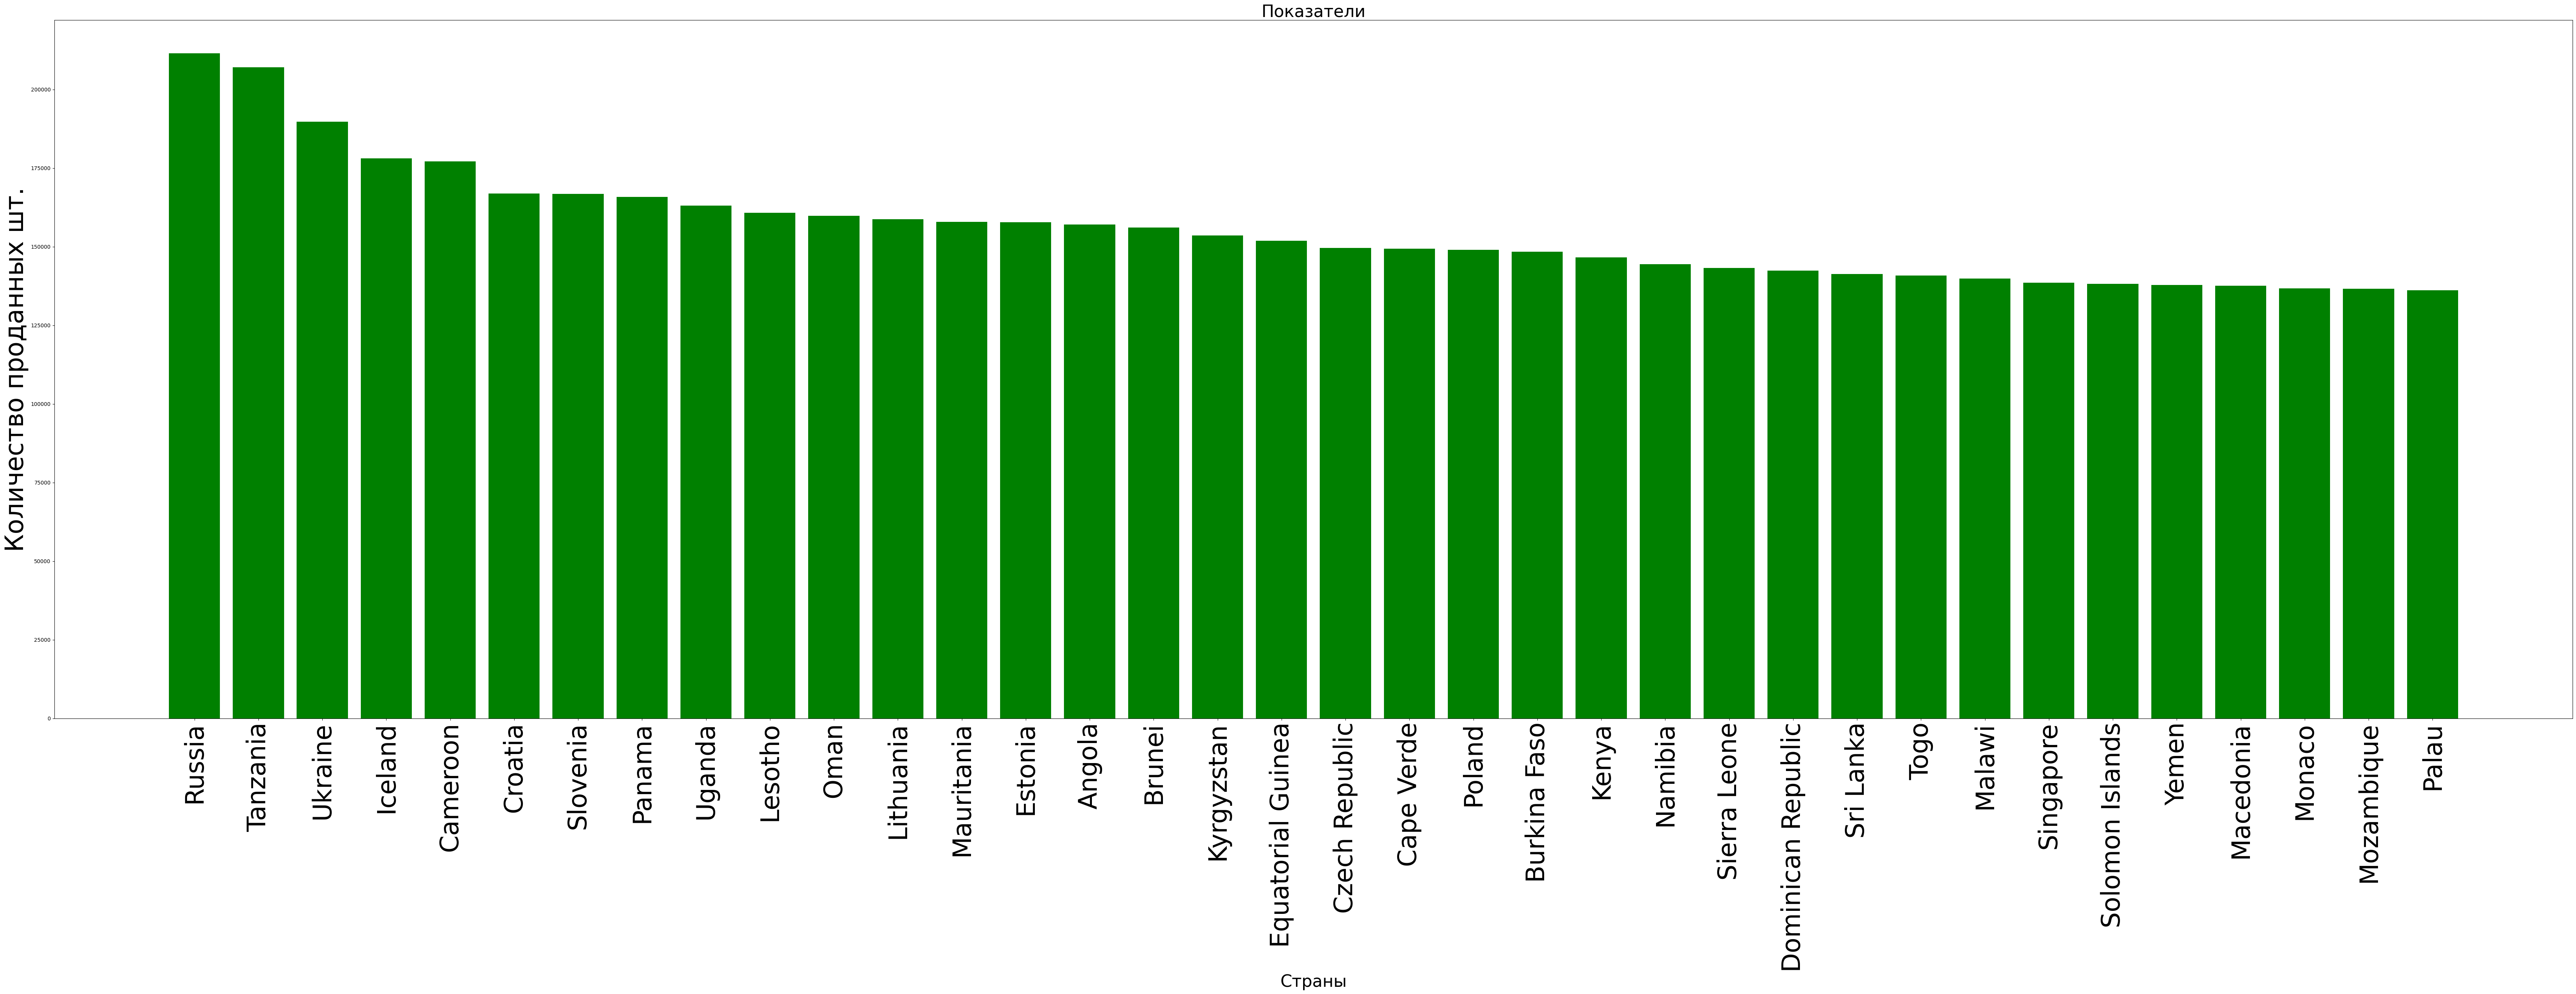

In [ ]:
fig, ax = plt.subplots(figsize=(86, 24))

ax.bar(df2.index, df2['Units Sold'], color='g')

ax.set_xlabel('Страны', fontsize=32)
ax.set_ylabel('Количество проданных шт.', fontsize=48)
ax.set_title('Показатели', fontsize=32)
plt.xticks(rotation=90, fontsize=48)

plt.show()

**Определимся с выбором кластеризации** 

---
Это нам поможет изначально рабить данные на группы и понять возможные шаги по перераспределению издержек и усилий по тому или иному направлению.

**Определяем количество кластеров**

*По методу построения Дендрограммы.*

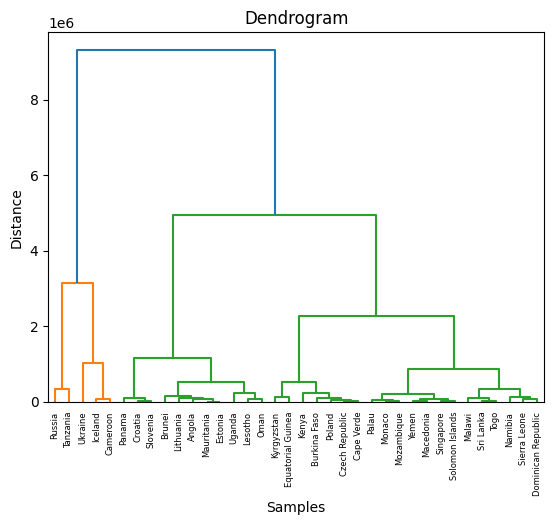

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(df2, method='ward')
dendrogram = dendrogram(linkage_matrix, labels=df2.index, orientation='top', leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.xticks(rotation=90, fontsize=6)
plt.show()

*Метод локтя и коэффициента силуэта.*


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

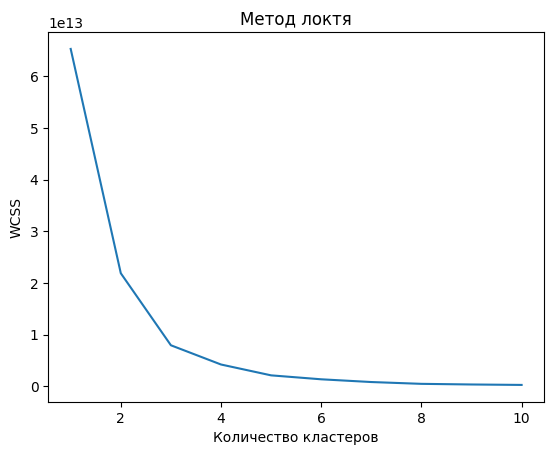

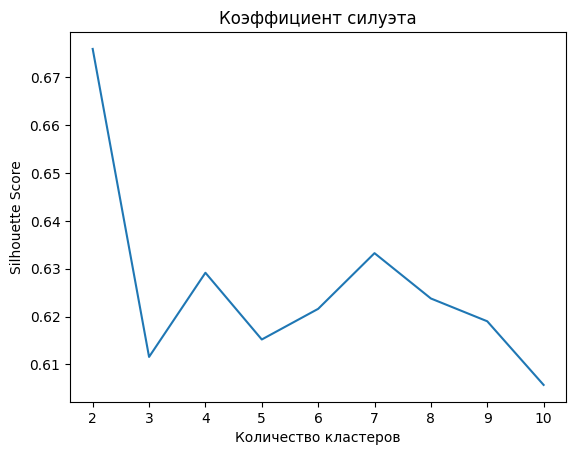

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Выберите столбцы, которые вы хотите использовать для анализа
X = df2[['Units Sold', 'Total Profit']]

# Определите оптимальное количество кластеров методом локтя
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

# Определите оптимальное количество кластеров методом коэффициента силуэта
sil = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))
plt.plot(range(2, 11), sil)
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.show()

**По приведенным выше методам определения количества кластеров делаем вывод, что оптимальное количество кластеров 3.**

*Метод иерархической кластеризации.* 

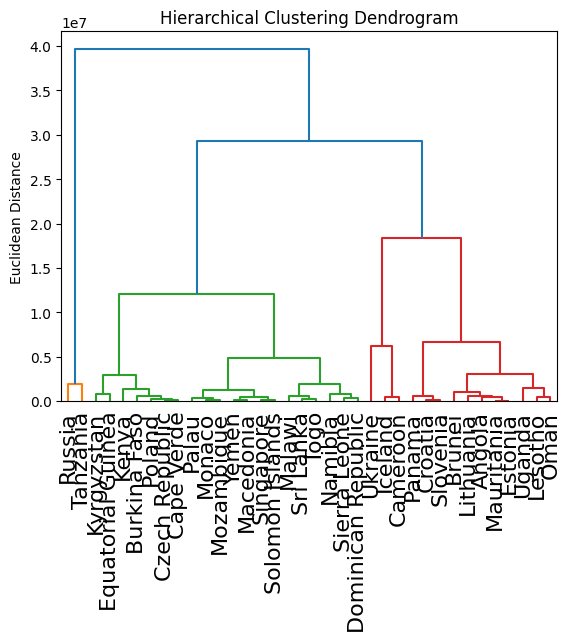

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


# вычисление евклидова расстояния между строками
distances = pdist(df2.values, metric='euclidean')

# преобразование расстояний в квадратную матрицу
sq_distances = squareform(distances)

# иерархическая кластеризация методом взвешенного среднего объединения
linkage_matrix = linkage(sq_distances, method='ward')

# построение дендрограммы
dendrogram(linkage_matrix, labels=df2.index, orientation='top', leaf_font_size=10)

plt.ylabel('Euclidean Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.xticks(rotation=90, fontsize=16)
plt.show()


# **Оценка**

**Дендограмма, по моему мнению, показала наиболее точный результат распределения по группам. Таким образом проведя анализ всех подгрупп товаров, можно найти пересечения и выявить максимально продуктивные и безпроблемные направления. По отстающим группам, как в явном виде, так и по пересечениям, необходимо провести дополнительный анализ, разместить больше актуальной рекламы, подключить СММ к продвижению залежашегося на складах товаров. При этом, можно сократить расходы на рекламу в странах с большим уровнем продаж. Также необходимо провести анализ по актуальности конкретных товаров в подгруппах для конкретной страны, возможно надо сменить ассортимент. Также, необходимо провести анализ доходов в отставших странах и выбрать более доступные товары в подгруппах.**

Самые большие продажи по одежде в Russia, Tanzania, Ukraine, Iceland и  Cameroon. Возможно удастся уменьшить издержки на рекламу и перераспределить по остальным группам (кластерам).  Учитывая количество населения Croatia, Slovenia, Panama, Lesotho, Oman, Lithuania, Mauritania, Estonia,  Angola и Brunei продажи вполне сответствуют ожиданиям. Соответственно можно высвободить часть средств для решения проблем в третьей группе. Выпадает из второй группы Uganda с высокой численностью населения. Учтем ее в третьей группе (кластере).  По третьей группе необходимо провести дополнительные изыскания (Kyrgyzstan, Equatorial, Guinea, Czech Republic, Cape Verde, Poland, Burkina Faso, Kenya, Namibia, Sierra Leone, Dominican Republic, Sri Lanka, Togo Malawi, Singapore, Solomon Islands, Yemen, Macedonia,  Monaco, Mozambique, Palau и Uganda)